# Linear Regressoin Assignment

## Problem Statement:

           A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

##### Essentially, the company wants —
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

### Assignment-based Subjectives Questions
1. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?
2. Why is it important to use drop_first=True during dummy variable creation?
3. Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?
4. How did you validate the assumptions of Linear Regression after building the model on the training set?
5. Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes?

### General Subjective Questions
1. Explain the linear regression algorithm in detail.
2. Explain the Anscombe’s quartet in detail.
3. What is Pearson’s R?
4. What is scaling? Why is scaling performed? What is the difference between normalized scaling and standardized scaling?
5. You might have observed that sometimes the value of VIF is infinite. Why does this happen?
6. What is a Q-Q plot? Explain the use and importance of a Q-Q plot in linear regression.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing libraries
2. Importing data using the pandas library
3. Understanding the structure of the data

In [1]:
import numpy as np
import pandas as pd

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) # to show maximum output

# scikit learn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# statsmodels library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
day = pd.read_csv('day.csv')

day.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510


In [3]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# - Dropping irrealvant columns

# Dropping instant column for no use
# Dropping dteday cause more convient data exist in dataframe
day = day.drop(['instant', 'dteday'], axis= 1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Visualising Numerical and Categorical Variables
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
- To analyze the Distribution of data we will use Univariate analysis


We'll visualise data by using `matplotlib` and `seaborn`.

In [7]:
import matplotlib.pyplot as plt, seaborn as sns

# Visualising Numerical Variables 

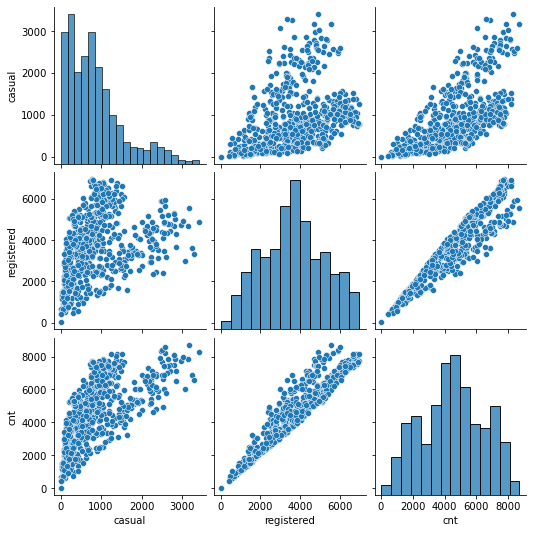

In [8]:
# Checking the correlation between casual, registered and cnt column
cd = day[['casual','registered','cnt']]
sns.pairplot(cd)
plt.show()

- inference : from above plots it means that the these variables are highly influenced with each other

In [9]:
# to avoid multicollinearity we delete the columns 'casual' and 'registered':

day.drop(['casual', 'registered'], axis=1, inplace=True) 

day.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985


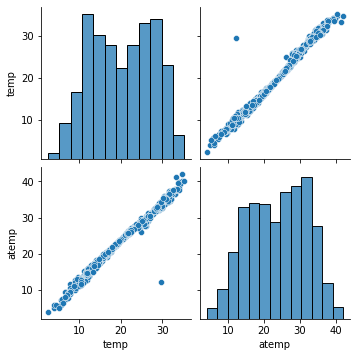

In [10]:
# Checking the correlation between temp and atemp

cd = day[['temp','atemp']]
sns.pairplot(cd)
plt.show()

- inference : from above plots it means that the these variables are highly influenced with each other

In [11]:
# to avoid multicollinearity we delete the columns 'temp' and 'atemp':

day.drop(['atemp'], axis=1, inplace=True) # dropping atemp column becuase its not actual data

day.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985


## Univariate Analysis on the day dataframe

#### Univariate Analysis on `cnt` column

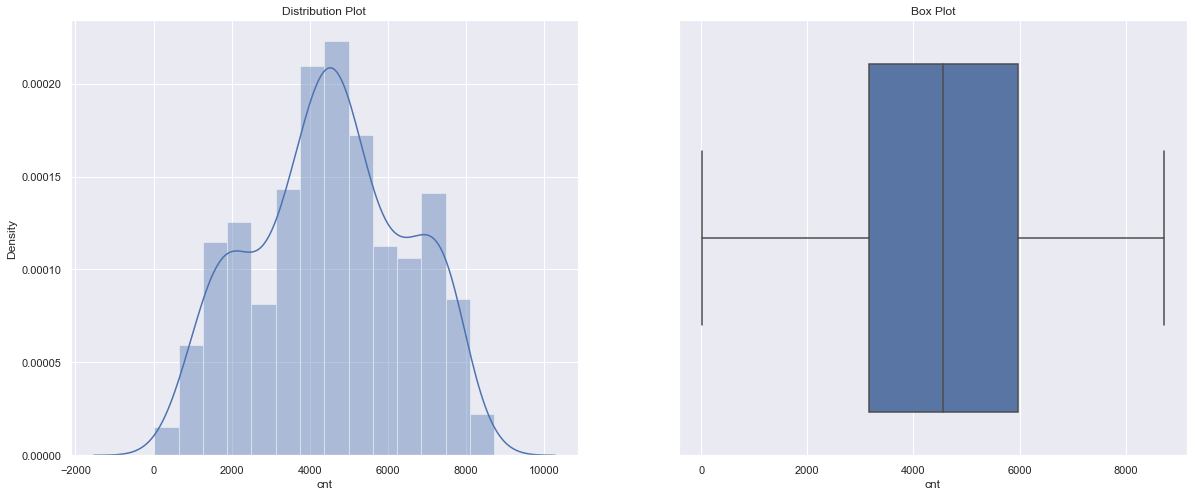

In [12]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(day['cnt'],ax=ax[0])
ax[1].set_title("Box Plot")
sns.boxplot(data = day, x='cnt',ax=ax[1],orient='v')
plt.show()

        data is normally distributed with mean 4500 in range between 0 to 10000

#### Univariate Analysis on `windspeed` column

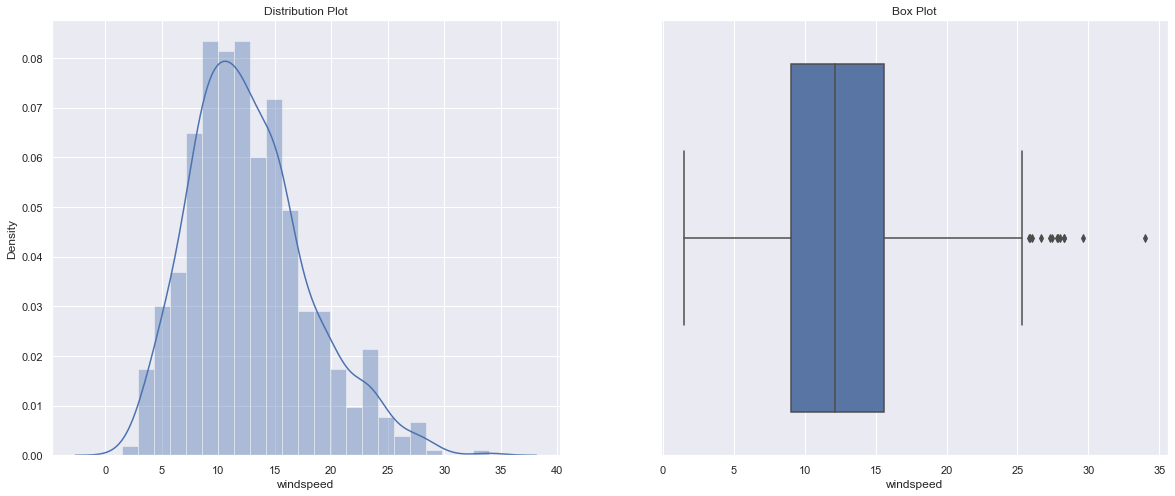

In [13]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(day['windspeed'],ax=ax[0])
ax[1].set_title("Box Plot")
sns.boxplot(data = day, x='windspeed',ax=ax[1],orient='v')
plt.show()

       data is normally distributed with mean 12 in range 0 to 30

#### Univariate analysis on `hum` column

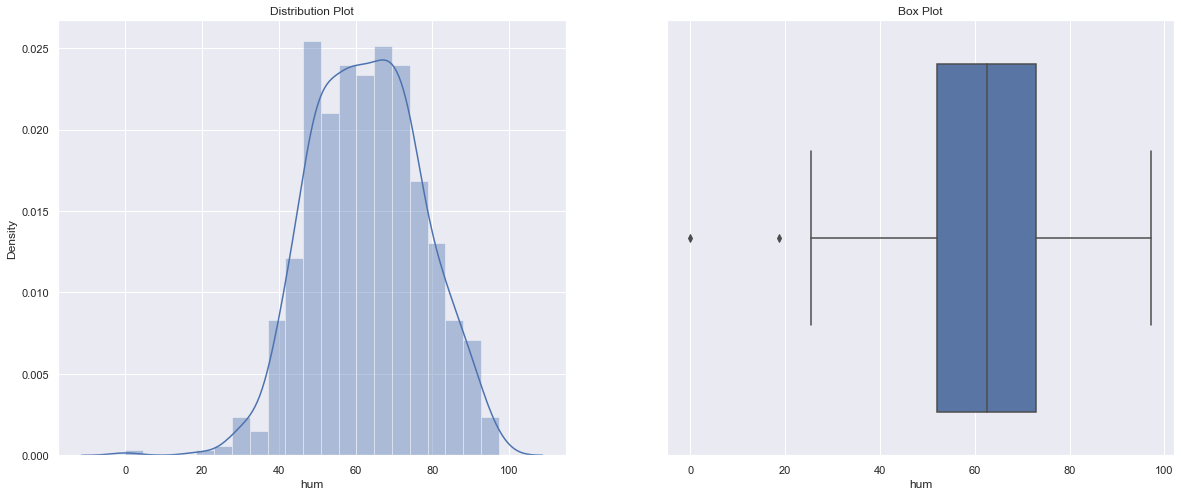

In [14]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(day['hum'],ax=ax[0])
ax[1].set_title("Box Plot")
sns.boxplot(data = day, x='hum',ax=ax[1],orient='v')
plt.show()

      data is asymmetrically normally distributed with mean 63

#### Univariate analysis on `temp` column

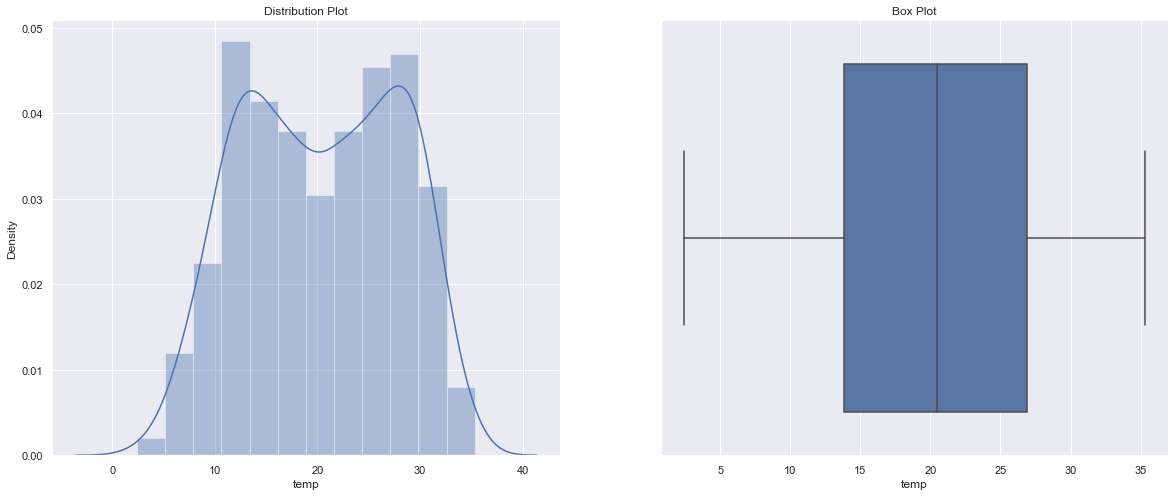

In [15]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(day['temp'],ax=ax[0])
ax[1].set_title("Box Plot")
sns.boxplot(data = day, x='temp',ax=ax[1],orient='v')
plt.show()

    data is normally distributed with mean 21 but it is slanted or off-center in some way in the centre 

###  Finding Correlation between predictor variables using pair-plot and Heat Map 

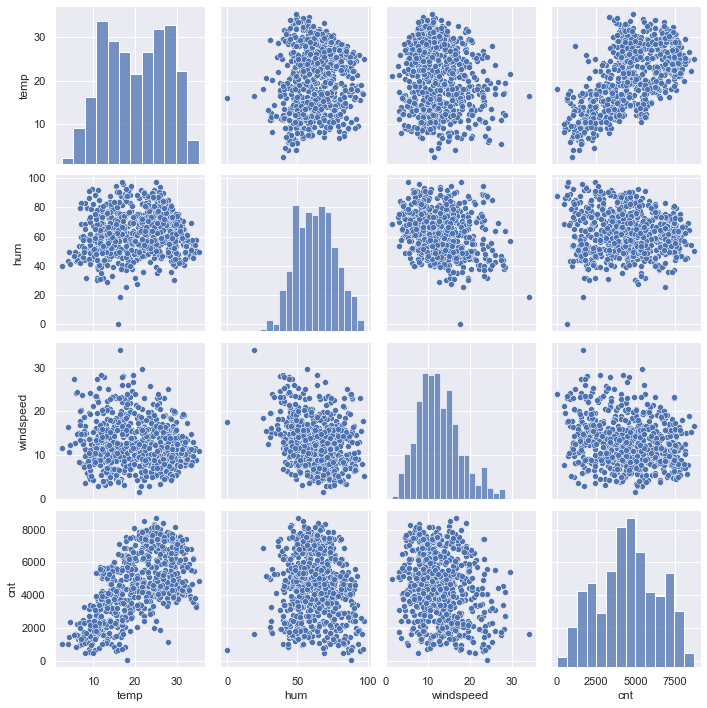

In [16]:
sns.pairplot(day[['temp','hum','windspeed','cnt']])
plt.show()

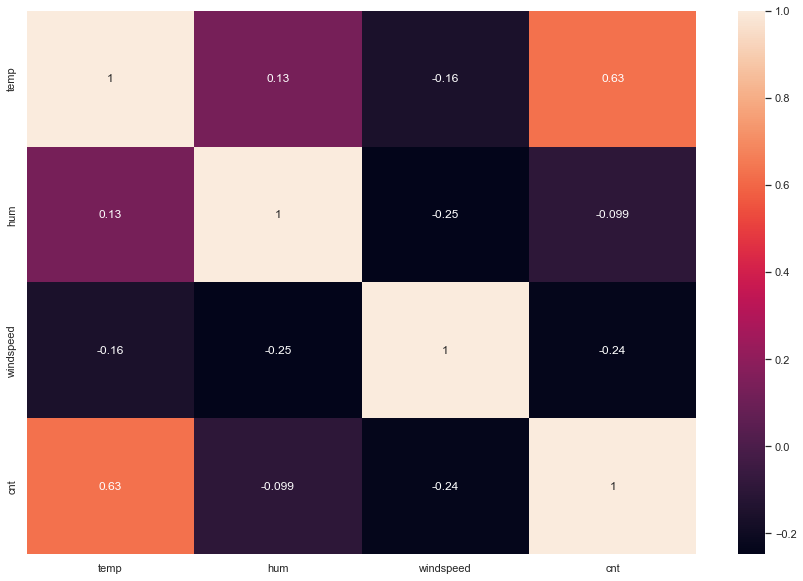

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(day[['temp','hum','windspeed','cnt']].corr(), 
            annot= True,)
plt.show()

######  Assignment-based Subjectives Question
###### 3. Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?
        Ans - based on pair-plot among the numerical variables 'temp' has the highest positive correlation 0.63 with the target variable 'cnt'

# Visualising Categorical Variables

In [18]:
day.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985


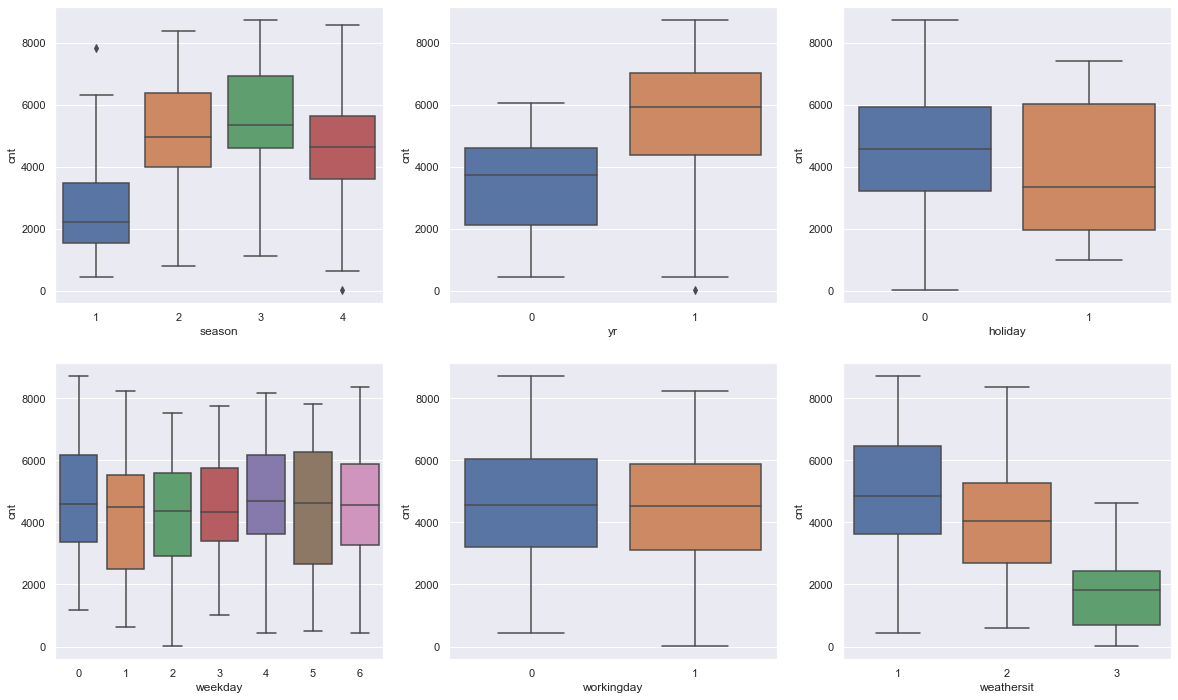

In [19]:
# to Visualise Categorical variables we will use Boxplot

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

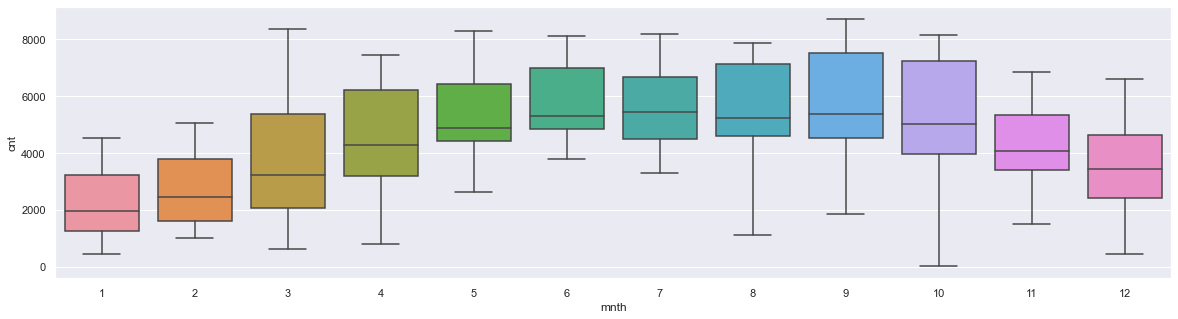

In [20]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.show()

######  Assignment-based Subjectives Question
###### 1. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?
- Ans :
        1. season Boxplot shows that during fall season maximum bikes are rented in plot 1
        2. year Boxplot shows that, in 2019 most bike as rented
        3. comparision between holiday, working day and weekday, the more bikes are rented in weekdays rather than weekend and holiday
        4. weatherit Boxplot shows that the most bikes are rented when atmospher is Clear, Few clouds, Partly cloudy
        5. month Boxplot shows that, in the month of september the maximum bikes are rented and
        followed by august and november month

## Step 3 : Data Preparation

- Dealing with Categorical columns
    Converting season, mnth,weathersit and weekday to categorical columns

    - season: values as per criteria = 1:Spring, 2:Summer, 3:Fall, 4:Winter
    - mnth: values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
    - weathersit: values as 1:Clear, 2:Misty, 3:Light_RainSnow
    - weekday: values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat

In [21]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [22]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


##### Creating Dummy Variables

In [23]:
day.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [24]:
season = pd.get_dummies(day['season'])

In [25]:
season.rename(columns={1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}, inplace = True)

In [26]:
season.head(1)

,Spring,Summer,Fall,Winter
0,1,0,0,0


######  Assignment-based Subjectives Question
###### 2. Why is it important to use drop_first=True during dummy variable creation?
- Ans:
        - It reduces the extra columns created, According to (n-1)Rule while creating the dummy variables to reduce the complexicity we have to create (n-1)columns, Hence it reduces the correlations created among dummy variables.  

In [27]:
day = pd.concat([day, season], axis = 1) # concating two dataframes

day.drop('season', axis=1, inplace=True) # to avoid multicollinearity dropping season column

day.head(1)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Fall,Winter
0,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,1,0,0,0


In [28]:
day.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [29]:
Months = pd.get_dummies(day['mnth'])

In [30]:
Months.rename(columns={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

In [31]:
Months.head(1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0


In [32]:
day = pd.concat([day, Months], axis=1)

day.drop('mnth', axis=1, inplace=True) # to avoid multicollinearity dropping mnth column

day.head(1)

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Fall,Winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,1,1,2,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [33]:
day.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [34]:
week = pd.get_dummies(day['weekday'])

week.rename(columns={0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}, inplace=True)

week.head(1)

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,0,1,0,0,0,0,0


In [35]:
day = pd.concat([day, week], axis=1)

day.drop('weekday', axis=1, inplace=True)

day.head(1)

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Fall,Winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,0,0,1,2,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [36]:
day.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [37]:
weather = pd.get_dummies(day['weathersit'])

weather.rename(columns={1:'Clear', 2:'Misty', 3:'Light_RainSnow'}, inplace=True)

weather.head(1)

,Clear,Misty,Light_RainSnow
0,0,1,0


In [38]:
day = pd.concat([day, weather], axis=1)

day.drop('weathersit', axis=1, inplace=True)

day.head(1)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Fall,Winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sun,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Misty,Light_RainSnow
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


## Step 4: Splitting the data into Train & Test Dataset

###### Getting Train & Test Split dataset

In [39]:
np.random.seed(0)
day_train, day_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
# Inspecting Shape of train and test dataset
print('day_train :', day_train.shape)
print('day_test :', day_test.shape)

day_train : (510, 33)
day_test : (219, 33)


In [41]:
day_train.describe() 

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Fall,Winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sun,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Misty,Light_RainSnow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.102429,63.112926,12.831318,4486.382353,0.243137,0.245098,0.262745,0.24902,0.088235,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.137255,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.627451,0.343137,0.029412
std,0.500429,0.157763,0.453386,7.431169,14.156632,5.291832,1952.158739,0.429398,0.430568,0.440557,0.43287,0.283915,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.344454,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
day_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Fall,Winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sun,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Misty,Light_RainSnow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,20.815737,61.961883,12.600130,4546.981735,0.255708,0.264840,0.246575,0.232877,0.077626,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.155251,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.652968,0.319635,0.027397
std,0.500722,0.188034,0.481313,7.689600,14.456669,4.984858,1898.633630,0.437258,0.442259,0.432005,0.423633,0.268194,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.362974,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.477117,0.467403,0.163612
min,0.000000,0.000000,0.000000,3.957390,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,51.166700,9.021282,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,60.916700,12.167200,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,72.192050,15.395629,5869.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Re-Scaling day_train Dataset

In [43]:
# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()

In [44]:
# applying MinMaxScaler to numeric variables of train dataset
num = ['temp', 'hum', 'windspeed', 'cnt']
day_train[num] = scaler.fit_transform(day_train[num])

In [45]:
day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Fall,Winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sun,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Misty,Light_RainSnow
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


###### plotting Correalation Coefficients matrix for day_train dataset

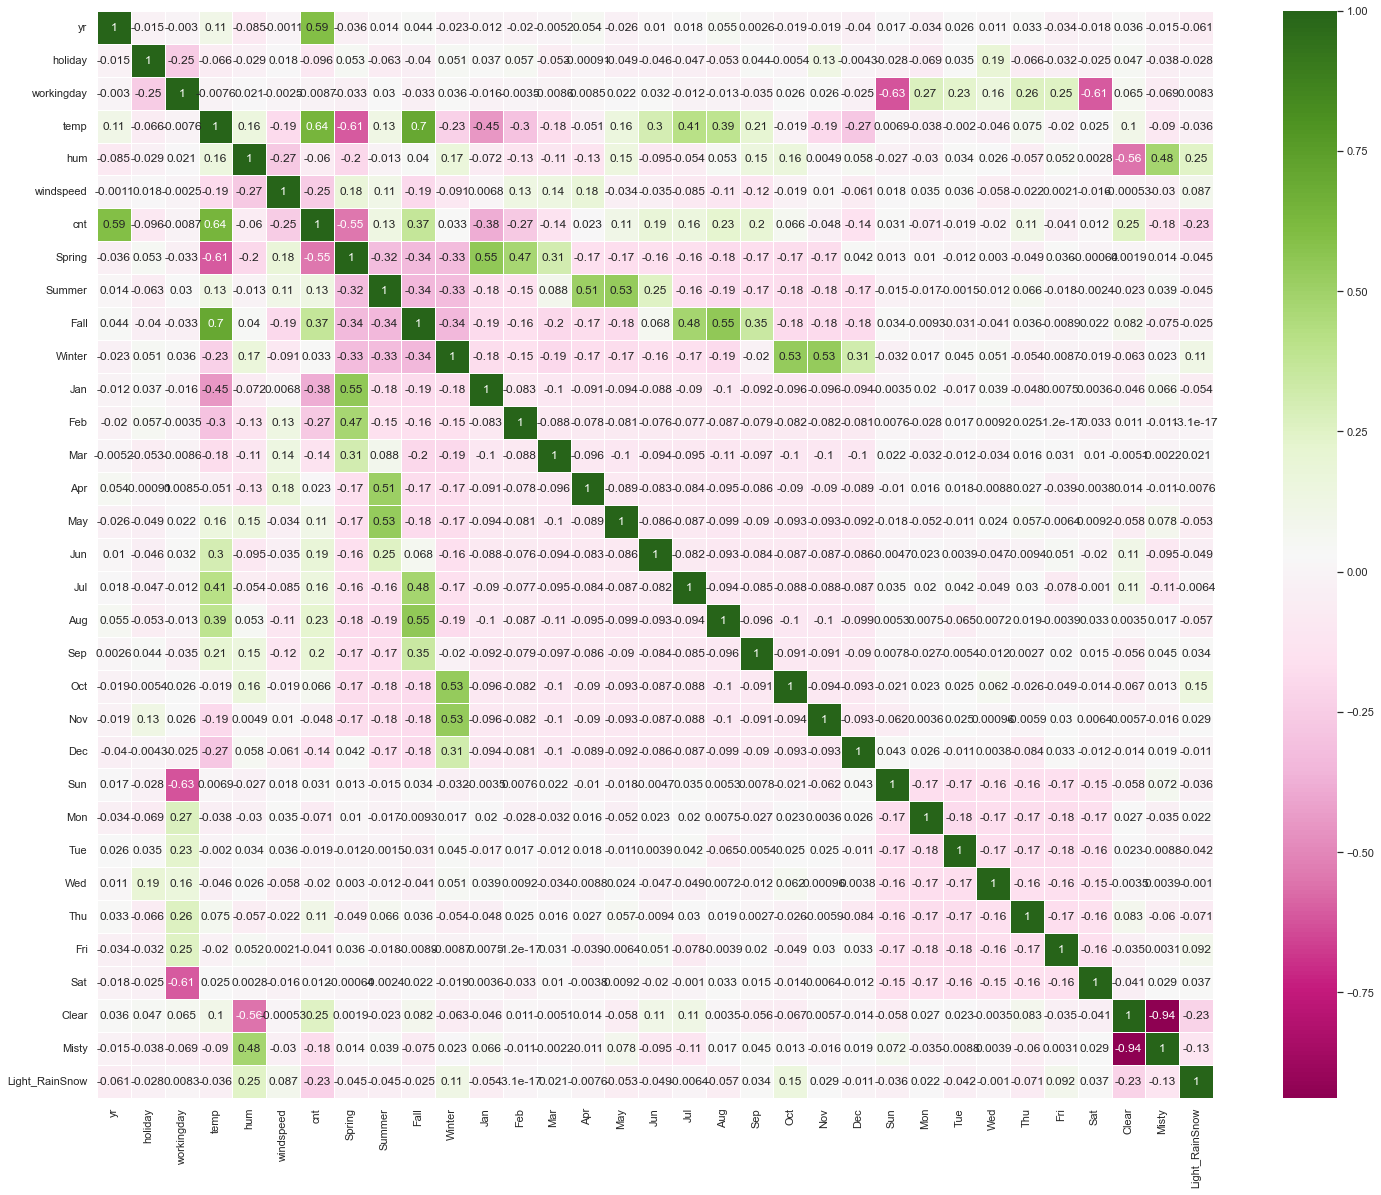

In [46]:
plt.figure(figsize = (25,20))
corr = sns.heatmap(day_train.corr(), annot = True, cmap="PiYG",linewidth =1)
plt.show()

- inferences :
     - There is multi-colinearity between the variables. We need to consider the factors while developing the model.
     

- High correlation


    - temp and yr has strong correlation with cnt
    - fall season having high correlation wiyh cnt compared other season
    
- Negative correlation


    - workingday variable has high negative correlation with Sat & Sun (where workingday =0)
    - Spring is negatively correlated with cnt
    
- normal correlation


    - misty weather and humidity has correlation
    - clear weather is showing good correaltion with cnt
    - all months with corresponding weather has correlations

## Step 5: Building the linear model

In [47]:
# Dividing into X_train and y_train
y_train = day_train.pop('cnt')
X_train = day_train

### RFE :
Recursive feature elimination (RFE) : From SciKit learn Library we'll be using LinearRegression Function to feature selection that fits a model and to removes the weakest feature for its compatibility with RFE

In [48]:
X_train.shape

(510, 32)

In [49]:
# Running RFE with the output number of the variable equal to 14
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 14) #Running RFE
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 19),
 ('workingday', False, 18),
 ('temp', True, 1),
 ('hum', False, 17),
 ('windspeed', False, 16),
 ('Spring', True, 1),
 ('Summer', False, 7),
 ('Fall', True, 1),
 ('Winter', True, 1),
 ('Jan', True, 1),
 ('Feb', True, 1),
 ('Mar', False, 8),
 ('Apr', False, 15),
 ('May', False, 3),
 ('Jun', False, 4),
 ('Jul', False, 9),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', False, 14),
 ('Nov', True, 1),
 ('Dec', True, 1),
 ('Sun', False, 10),
 ('Mon', False, 5),
 ('Tue', False, 2),
 ('Wed', False, 6),
 ('Thu', False, 11),
 ('Fri', False, 13),
 ('Sat', False, 12),
 ('Clear', True, 1),
 ('Misty', True, 1),
 ('Light_RainSnow', True, 1)]

In [51]:
# RFE Supported Columns 
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'temp', 'Spring', 'Fall', 'Winter', 'Jan', 'Feb', 'Aug', 'Sep',
       'Nov', 'Dec', 'Clear', 'Misty', 'Light_RainSnow'],
      dtype='object')

In [52]:
#RFE eleminated Columns
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'hum', 'windspeed', 'Summer', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Oct', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri',
       'Sat'],
      dtype='object')

In [53]:
# we will be using RFE Supported variables by Creating X_train dataframe 
X_train_rfe = X_train[rfe_col]

In [54]:
X_train_rfe.head()

,yr,temp,Spring,Fall,Winter,Jan,Feb,Aug,Sep,Nov,Dec,Clear,Misty,Light_RainSnow
653,1,0.509887,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0.815169,0,1,0,0,0,0,0,0,0,1,0,0
426,1,0.442393,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0.245101,1,0,0,0,0,0,0,0,1,1,0,0
482,1,0.395666,0,0,0,0,0,0,0,0,0,0,1,0


In [55]:
# using statsmodel we will build Manual Model 
def VIF_calculator(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
VIF_calculator(X_train_rfe)

,Features,VIF
11,Clear,21.34
12,Misty,11.50
1,temp,4.24
2,Spring,3.47
3,Fall,3.39
4,Winter,2.49
5,Jan,2.29
6,Feb,1.85
13,Light_RainSnow,1.84
9,Nov,1.77


In [57]:
# Add constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Creating a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the 1st lr model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     177.8
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          3.88e-177
Time:                        17:55:02   Log-Likelihood:                 480.51
No. Observations:                 510   AIC:                            -933.0
Df Residuals:                     496   BIC:                            -873.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0739      0.019      3.

In [58]:
X_train_rfe1 = X_train_rfe.drop(['Clear'], axis = 1)
# Run the function to calculate VIF for the new model
VIF_calculator(X_train_rfe1)

,Features,VIF
1,temp,4.91
3,Fall,4.23
2,Spring,3.63
4,Winter,3.06
5,Jan,2.23
0,yr,2.06
6,Feb,1.88
7,Aug,1.85
9,Nov,1.80
10,Dec,1.58


In [59]:
# Modelling
# Add constant
X_train_lm1 = sm.add_constant(X_train_rfe1)

# Creating a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the 1st lr model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     177.8
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          3.88e-177
Time:                        17:55:02   Log-Likelihood:                 480.51
No. Observations:                 510   AIC:                            -933.0
Df Residuals:                     496   BIC:                            -873.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2262      0.025      9.

In [60]:
X_train_rfe2 = X_train_rfe1.drop(['Feb'], axis = 1)
# Run the function to calculate VIF for the new model
VIF_calculator(X_train_rfe2)

,Features,VIF
1,temp,4.85
3,Fall,4.20
4,Winter,2.99
2,Spring,2.07
0,yr,2.06
6,Aug,1.85
8,Nov,1.78
5,Jan,1.66
10,Misty,1.53
7,Sep,1.51


In [61]:
# Model 2
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Creating a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the 1st lr model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          1.12e-177
Time:                        17:55:02   Log-Likelihood:                 479.06
No. Observations:                 510   AIC:                            -932.1
Df Residuals:                     497   BIC:                            -877.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2169      0.024      8.

In [62]:
X_train_rfe3 = X_train_rfe2.drop(['Jan'], axis = 1)
# Run the function to calculate VIF for the new model
VIF_calculator(X_train_rfe3)

,Features,VIF
1,temp,4.74
3,Fall,4.16
4,Winter,2.95
0,yr,2.05
5,Aug,1.85
7,Nov,1.77
6,Sep,1.51
9,Misty,1.51
8,Dec,1.43
2,Spring,1.38


In [63]:
# Model 3
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Creating a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the 1st lr model
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.7
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          4.36e-178
Time:                        17:55:03   Log-Likelihood:                 477.26
No. Observations:                 510   AIC:                            -930.5
Df Residuals:                     498   BIC:                            -879.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2049      0.023      8.

In [64]:
X_train_rfe4 = X_train_rfe3.drop(['Dec'], axis = 1)
# Run the function to calculate VIF for the new model
VIF_calculator(X_train_rfe4)

,Features,VIF
1,temp,4.69
3,Fall,4.10
4,Winter,2.23
0,yr,2.05
5,Aug,1.85
7,Nov,1.56
8,Misty,1.51
6,Sep,1.49
2,Spring,1.32
9,Light_RainSnow,1.06


In [65]:
# Model 4
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Creating a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the 1st lr model
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          7.89e-179
Time:                        17:55:03   Log-Likelihood:                 476.20
No. Observations:                 510   AIC:                            -930.4
Df Residuals:                     499   BIC:                            -883.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1972      0.023      8.

In [66]:
X_train_rfe5 = X_train_rfe4.drop(['Nov'], axis = 1)
# Run the function to calculate VIF for the new model
VIF_calculator(X_train_rfe5)

,Features,VIF
1,temp,4.68
3,Fall,4.07
0,yr,2.05
5,Aug,1.85
4,Winter,1.59
7,Misty,1.51
6,Sep,1.47
2,Spring,1.32
8,Light_RainSnow,1.06


In [67]:
# Model 5
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Creating a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the 1st lr model
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.5
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          2.53e-179
Time:                        17:55:03   Log-Likelihood:                 474.50
No. Observations:                 510   AIC:                            -929.0
Df Residuals:                     500   BIC:                            -886.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.023      8.

In [68]:
X_train_rfe6 = X_train_rfe5.drop(['Aug'], axis = 1)
# Run the function to calculate VIF for the new model
VIF_calculator(X_train_rfe6)

,Features,VIF
1,temp,4.67
3,Fall,2.99
0,yr,2.05
4,Winter,1.59
6,Misty,1.50
2,Spring,1.31
5,Sep,1.27
7,Light_RainSnow,1.06


In [69]:
# Model 6
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Creating a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the 1st lr model
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.3
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          3.09e-179
Time:                        17:55:03   Log-Likelihood:                 471.38
No. Observations:                 510   AIC:                            -924.8
Df Residuals:                     501   BIC:                            -886.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1902      0.023      8.

In [70]:
# inspecting the parameters obtained from lr7 model
lr6.params

const             0.190203
yr                0.233464
temp              0.491482
Spring           -0.118449
Fall             -0.051191
Winter            0.043084
Sep               0.091519
Misty            -0.076679
Light_RainSnow   -0.296684
dtype: float64

**As you can see in above details of VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.**

## Step 6: Residual Analysis of the train data

In [71]:
y_train_pred = lr6.predict(X_train_lm6)

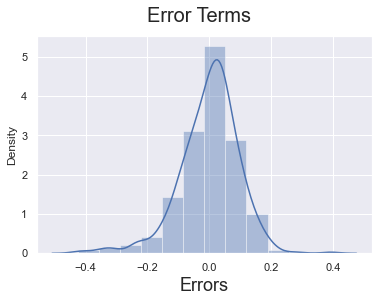

In [72]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Step 7: Making Predictions Using the Final Model

In [73]:
day_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Fall,Winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sun,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Misty,Light_RainSnow
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [74]:
num_columns=['cnt','temp','hum','windspeed']
day_test[num_columns] = scaler.transform(day_test[num_columns])

In [75]:
day_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Fall,Winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sun,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Misty,Light_RainSnow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.214503,1.897202,-0.001081,138.115649,0.255708,0.264840,0.246575,0.232877,0.077626,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.155251,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.652968,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.079240,0.463866,0.000573,57.702212,0.437258,0.442259,0.432005,0.423633,0.268194,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.362974,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.477117,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.040780,0.724590,-0.002358,13.328946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.145234,1.550821,-0.001493,100.324447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.214418,1.863665,-0.001131,139.088730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.282370,2.225453,-0.000760,178.308885,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.358772,3.029478,0.000690,255.062470,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [76]:
y_test = day_test.pop('cnt')
X_test = day_test

In [77]:
X_test.shape

(219, 32)

In [78]:
y_test.shape

(219,)

In [79]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [80]:
X_train.shape

(510, 32)

In [81]:
X_test_m.shape

(219, 33)

In [82]:
X_test_m.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Fall', 'Winter', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Sun', 'Mon', 'Tue',
       'Wed', 'Thu', 'Fri', 'Sat', 'Clear', 'Misty', 'Light_RainSnow'],
      dtype='object')

In [83]:
lr6.params

const             0.190203
yr                0.233464
temp              0.491482
Spring           -0.118449
Fall             -0.051191
Winter            0.043084
Sep               0.091519
Misty            -0.076679
Light_RainSnow   -0.296684
dtype: float64

In [84]:
X_test_m.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Fall', 'Winter', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Sun', 'Mon', 'Tue',
       'Wed', 'Thu', 'Fri', 'Sat', 'Clear', 'Misty', 'Light_RainSnow'],
      dtype='object')

In [85]:
cols = ['yr', 'temp', 'Spring','Fall','Winter','Sep','Misty', 'Light_RainSnow']

In [86]:
drops = [ 'holiday', 'workingday', 'hum', 'windspeed', 'Summer', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Oct', 'Nov', 'Dec', 'Sun', 'Mon', 'Tue',
       'Wed', 'Thu', 'Fri', 'Sat', 'Clear']

In [87]:
X_test_m = X_test_m.drop(drops , axis = 1)

In [88]:
y_pred_m = lr6.predict(X_test_m)

## Step 9: Model Evaluation:

Text(0, 0.5, 'y_pred')

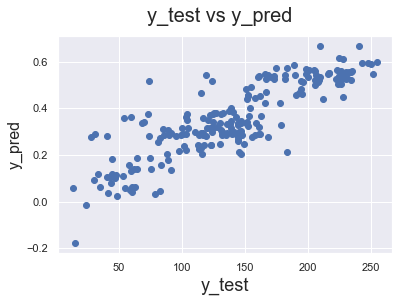

In [89]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

- Significant variables to predict the demand for shared bikes
    - from Model 6 we got the 8 predictor variables
            yr                0.233464
            temp              0.491482
            Spring           -0.118449
            Fall             -0.051191
            Winter            0.043084
            Sep               0.091519
            Misty            -0.076679
            Light_RainSnow   -0.296684